In [11]:
###Sara Vannah


# import necessary modules
# uncomment to get plots displayed in notebook
import sys, platform, os
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import scipy as sp
from scipy.interpolate import griddata
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as colors
from matplotlib import cm

In [12]:
#plotting run of MOD_pheno_axion_transition_tests.ini varying log_ac and frac_fld

log_ac_vals, frac_fld_vals, JSD_vals = np.loadtxt('/Users/saravannah/Axion-MCMC/axion_MCMC/PHENO_vary_ac_and_frac_fld.txt', unpack=True)

#fig = plt.figure()
#ax = fig.gca(projection='3d')

#ax.scatter(log_ac_vals, frac_fld_vals, JSD_vals, c=JSD_vals, cmap=cm.jet)

#ax.set_xlim3d(-2, 0)
#ax.set_ylim3d(-2,2)
#ax.set_zlim3d(5e-4,2e-3)

In [13]:
##borrowed this from first paper analysis - MCMC_error_bars.ipynb

#data manipulation to decrease number of points
#fewer points = less computationally intensive interpolation

#distance between two points
def dist(x1,y1,z1, x2, y2, z2):
    return np.sqrt((x1-x2)**2+(y1-y2)**2+(z1-z2)**2)
#arrays for X, Y, Z (w0, wa, JSD), and int minimum distance between points
def reduc_arr(X_arr, Y_arr, Z_arr, min_dist):
    pbar = tqdm(total=len(X_arr))
    #abbreviated arrays of points
    X_new = [X_arr[1]]
    Y_new = [Y_arr[1]]
    Z_new = [Z_arr[1]]
    for i in range(len(X_arr)): 
        point_nearby = False
        for j in range(len(X_new)):
            #check if there's another point nearby
            if dist(X_arr[i], Y_arr[i], Z_arr[i], X_new[j], Y_new[j], Z_new[j]) < min_dist:
                point_nearby = True  
        #also removing the absurd wa tail
        if not point_nearby and Y_arr[i] > -1.0:# and Z_arr[i] < 1e-2:
            #no point already saved nearby, so save the point
            X_new.append(X_arr[i])
            Y_new.append(Y_arr[i])
            Z_new.append(Z_arr[i])
        pbar.update(1)
    return X_new, Y_new, Z_new

In [107]:
def contour_plot(x, y, z, title=None):
    
    matplotlib.rcParams['text.usetex'] = True
    
    dif_x, dif_y = max(x)-min(x), max(y)-min(y)
    
    #grid_x, grid_y = np.mgrid[min(x):max(x):20j, min(y):max(y):20j]
    grid_x, grid_y = np.mgrid[min(x)+.2*dif_x:max(x)-.2*dif_x:100j, min(y)+.4*dif_y:max(y)-.4*dif_y:100j]
    grid_z = griddata((x, y), z, (grid_x, grid_y), method='cubic')
    
    #print(grid_z)
    
    fig = plt.figure(figsize=(10,10))
    #plt.tight_layout()
    ax = fig.add_subplot(projection='3d')
    
    ax.plot_surface(grid_x, grid_y, grid_z, cmap=cm.jet)

    ax.set_xlabel(r'log$_{10}$(a$_c$)', fontsize=18)
    ax.set_ylabel(r'f$_{EDE}$', fontsize=18)
    ax.set_zlabel(r'D$_{JS}$', fontsize=18)
    
    
    
    #xlabels = np.around(np.linspace(min(x), max(x), num=5), 2)
    #ylabels = np.around(np.linspace(min(y), max(y), num=5), 2)
    #zlabels = np.around(np.linspace(min(z), max(z), num=5), 2)
    
    #ax.set_xticklabels(xlabels, fontsize=10)
    #ax.set_yticklabels(ylabels, fontsize=10)
    #ax.set_zticklabels(zlabels, fontsize=10)
    
    #ax.tick_params(axis='x', labelsize=10)
    #ax.tick_params(axis='y', labelsize=10)
    #ax.tick_params(axis='z', labelsize=10)
    
    
    ax.xaxis.set_major_locator(plt.MaxNLocator(5))
    ax.yaxis.set_major_locator(plt.MaxNLocator(5))
    ax.zaxis.set_major_locator(plt.MaxNLocator(5))
    
    ax.dist = 11
    #if title is not None:
    #    ax.set_title(title)
    
%matplotlib    
#this should be a pretty contour using the cubic method but I need more points   
contour_plot(log_ac_vals, frac_fld_vals, JSD_vals, title='n_axion=inf?')

Using matplotlib backend: MacOSX


In [108]:
log_ac_vals_3, frac_fld_vals_3, JSD_vals_3 = np.loadtxt('/Users/saravannah/Axion-MCMC/axion_MCMC/vary_ac_and_frac_ac_naxion=3.txt', unpack=True)
log_ac_vals_2, frac_fld_vals_2, JSD_vals_2 = np.loadtxt('/Users/saravannah/Axion-MCMC/axion_MCMC/vary_ac_and_frac_ac_naxion=2.txt', unpack=True)

In [109]:
contour_plot(log_ac_vals_3, frac_fld_vals_3, JSD_vals_3, title='n_axion=3')

In [81]:
contour_plot(log_ac_vals_2, frac_fld_vals_2, JSD_vals_2, title='n_axion=2')

<ipython-input-78-014e5a7159ed>:15: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')
<ipython-input-78-014e5a7159ed>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xlabels, fontsize=10)
<ipython-input-78-014e5a7159ed>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels, fontsize=10)
<ipython-input-78-014e5a7159ed>:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_zticklabels(zlabels, fontsize=10)


In [82]:
print(max([-5,3,-2,0]))

3


In [32]:
#Bubble sorting algortihm from https://realpython.com/sorting-algorithms-python/#the-bubble-sort-algorithm-in-python

def reorganize(log_ac_vals, JSD_vals):
    new_log_ac_vals, new_JSD_vals = log_ac_vals, JSD_vals
    n = len(log_ac_vals)
    
    for i in range(n):
        already_sorted = True
        
        for j in range(n-i-1):
            if new_log_ac_vals[j] > new_log_ac_vals[j+1]:
                new_log_ac_vals[j], new_log_ac_vals[j+1] = new_log_ac_vals[j+1], new_log_ac_vals[j]
                new_JSD_vals[j], new_JSD_vals[j+1] = new_JSD_vals[j+1], new_JSD_vals[j]
                
                already_sorted = False
                
        if already_sorted:
            break
            
    return new_log_ac_vals, new_JSD_vals
        

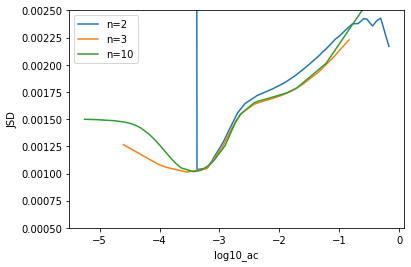

In [33]:
#plotting runs of example_axiCLASS.ini varying log10_ac for different values of n_axion

log_ac_n2, JSD_n2 = np.loadtxt('vary_ac_naxion=2.txt', unpack=True)
log_ac_n3, JSD_n3 = np.loadtxt('vary_ac_naxion=3.txt', unpack=True)
log_ac_n10, JSD_n10 = np.loadtxt('vary_ac_naxion=10.txt', unpack=True)

log_ac_n2, JSD_n2 = reorganize(log_ac_n2, JSD_n2)
log_ac_n3, JSD_n3 = reorganize(log_ac_n3, JSD_n3)
log_ac_n10, JSD_n10 = reorganize(log_ac_n10, JSD_n10)


plt.plot(log_ac_n2, JSD_n2, label='n=2')
plt.plot(log_ac_n3, JSD_n3, label='n=3')
plt.plot(log_ac_n10, JSD_n10, label='n=10')
plt.xlabel('log10_ac')
plt.ylabel('JSD')

plt.ylim([0.0005,0.0025])
#plt.xlim([-3.2,-2.9])
plt.legend()

#plt.savefig('JSD_vs_log10_ac.pdf')

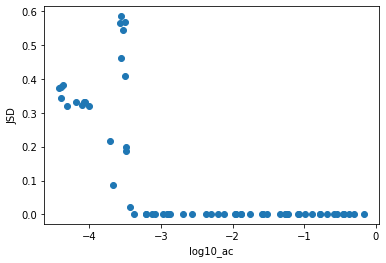

In [27]:
plt.scatter(log_ac_n2, JSD_n2)
plt.xlabel('log10_ac')
plt.ylabel('JSD')
#plt.savefig('JSD_vs_log10_ac_n=2.pdf')